Импортируем numpy, pandas и matplotlib.pyplot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

загрузим учебный датасет в pandas.DataFrame с помощью pd.read_csv. Протестируем работу методов head(), info(), describe()

In [65]:
data = pd.read_csv('S02-hw-dataset.csv')
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [6]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


посчитаем долю пропусков в каждом столбце

In [7]:
data.isna().sum()

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

видим, что есть две записи для которых запись о возрасте отсутствует

посчитаем количество полностью дублируюших строк в наборе данных

In [10]:
data.duplicated().sum()

np.int64(1)

выведем "подозрительные" строки, в которых данные протеворечат здравому смыслу

In [42]:
for i in range(len(data)-1):
    if data.iloc[i]['revenue']*data.iloc[i]["purchases"] < 0 or (data.iloc[i]['age'] < 14 or data.iloc[i]['age'] > 100) or data.iloc[i].isna().any():
        print(data.iloc[[i]])

   user_id  age country  purchases  revenue
4        5  NaN      DE          6     1296
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
    user_id  age country  purchases  revenue
12       13  NaN      US          9      630
    user_id  age country  purchases  revenue
20       21  5.0      RU          8     1488


видим что в нашем датасете есть записи характерные проблемы в виде записей с пустыми полями и полями с отрицательными/неправдоподобными значениями

посчитаем посчитаем частоту для категориального признака данного датассета

In [46]:
country = data['country'].value_counts()
print(country)
len(country)

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


5

всего 5 уникальных стран.

проведем группировку с помощью groupby() и применем функции агрегации

In [61]:
group = data.groupby("country")[['revenue', 'purchases']].agg(['mean','sum','count'])
group

revenue              purchases          
                mean    sum count      mean sum count
country                                              
CN       1054.000000   2108     2  4.500000   9     2
DE       1445.500000   8673     6  6.500000  39     6
FR        675.916667   8111    12  4.250000  51    12
RU        790.076923  10271    13  4.769231  62    13
US        557.375000   4459     8  4.625000  37     8

после группировки по странам можно увидеть средний доход, общую сумму доходов и аналогичные данные для кол-ва покупок

На основе анализа частот и группировок можно сделать следующие выводы:
В датасете представлены пользователи из нескольких стран. По частотам видно, какие страны доминируют в выборке. При группировке по странам обнаруживаются различия в среднем доходе и количестве покупок между странами - некоторые страны показывают заметно более высокий средний доход или активность покупок, что может указывать на разные предпочтения пользователей или особенности рынка

С помощью библиотеки matplotlib построим гистограмму для количественного признака. можно сделать вывод о доходах пользователей и их количестве

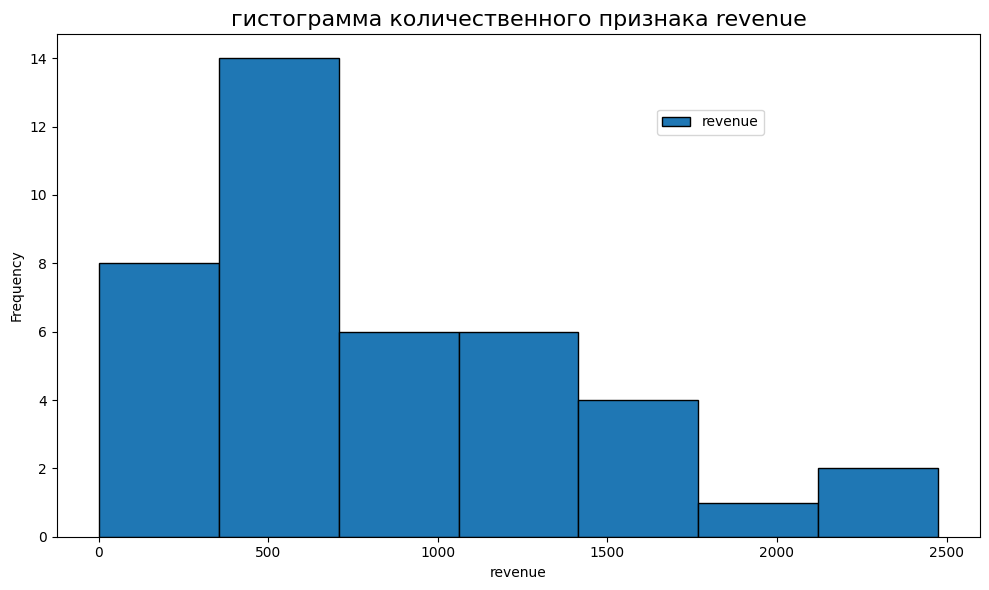

In [106]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.hist( 
    data["revenue"].dropna(), bins="sturges", # автоматический расчет по Стерджесу
    label="revenue", 
    edgecolor='black'
)

ax1.legend(loc=(0.65, 0.8)) 
ax1.set_title('гистограмма количественного признака revenue', fontsize=16)
ax1.set_xlabel("revenue") 
ax1.set_ylabel("Frequency") 

plt.savefig("C:\\Новая папка\\aie-WW\\homeworks\\HW02\\figures\\hist.png",bbox_inches ="tight", 
			pad_inches = 1, 
			transparent = True, 
			facecolor ="white", 
			edgecolor ='black', 
			orientation ='landscape')
plt.tight_layout()
plt.show()

для количиственного признака покупок построим boxplot. С помощью данного графика можно узнать насколько данные изменчивы, как они разбросаны, есть ли в них аномалии.

C:\Users\kloch\AppData\Local\Temp\ipykernel_37268\3154966886.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(


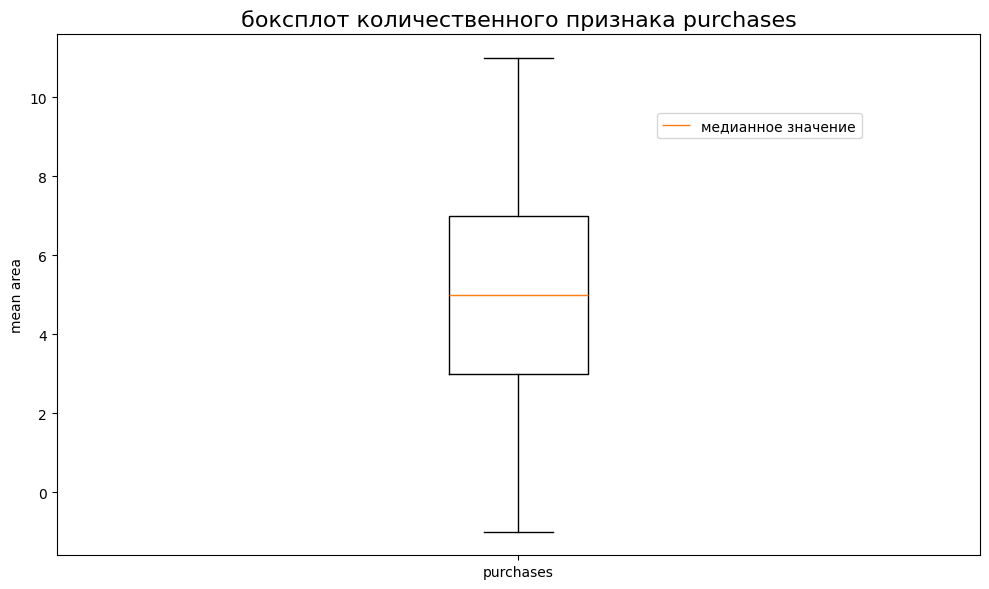

In [104]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.boxplot( 
    data["purchases"].dropna(),
    labels=["purchases"], 
    label="медианное значение"
)

ax1.legend(loc=(0.65, 0.8))  
ax1.set_ylabel("mean area") 
ax1.set_title('боксплот количественного признака purchases', fontsize=16)
plt.savefig("C:\\Новая папка\\aie-WW\\homeworks\\HW02\\figures\\boxplot.png",bbox_inches ="tight", 
			pad_inches = 1, 
			transparent = True, 
			facecolor ="white", 
			edgecolor ='black', 
			orientation ='landscape')
plt.tight_layout()
plt.show()

сделаем диаграмму рассеяния для двух количественных признаков purchases и revenue.

C:\Users\kloch\AppData\Local\Temp\ipykernel_37268\2739212853.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc=(0.65, 0.8))


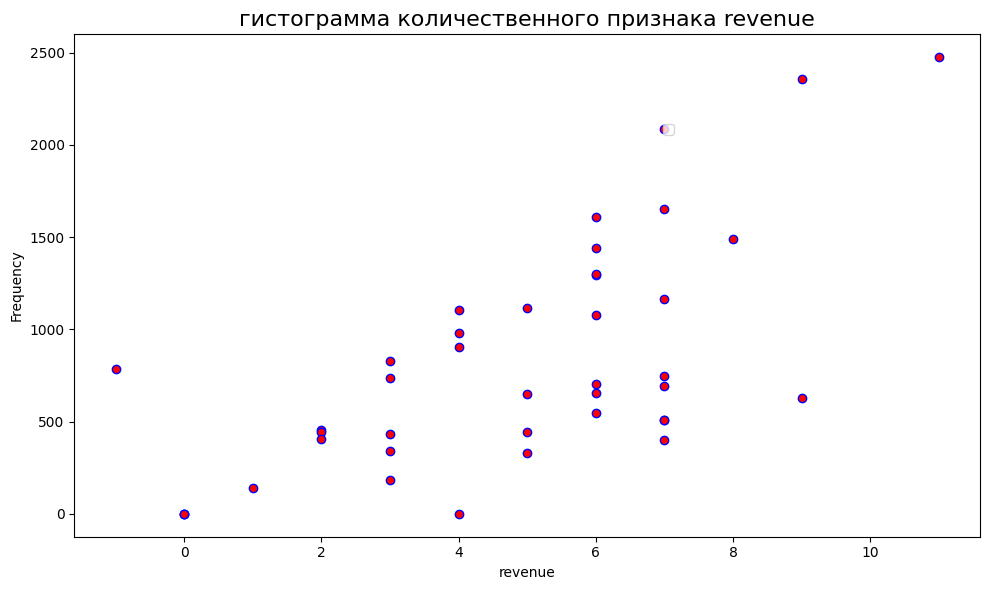

In [107]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.scatter(x=data["purchases"].dropna(), y=data["revenue"].dropna(), marker='o', c='r', edgecolor='b') 
ax1.set_title('диаграмма рассеяния для двух количественных признаков purchases и revenue') 
ax1.set_xlabel('$purchases$') 
ax1.set_ylabel('$revenue$') 

ax1.legend(loc=(0.65, 0.8)) 
ax1.set_title('гистограмма количественного признака revenue', fontsize=16)
ax1.set_xlabel("revenue") 
ax1.set_ylabel("Frequency") 

plt.savefig("C:\\Новая папка\\aie-WW\\homeworks\\HW02\\figures\\scatter.png",bbox_inches ="tight", 
			pad_inches = 1, 
			transparent = True, 
			facecolor ="white", 
			edgecolor ='black', 
			orientation ='landscape')
plt.tight_layout()
plt.show()